In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
plt.style.use("seaborn")
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

In [3]:
data = pd.read_csv('data_cleaned.csv')

In [4]:
data.head()

,Adjusted_Grade,New?,Other_Location_Code_in_LCGMS,School_Name,SED_Code,Location_Code,District,Latitude,Longitude,Address_(Full),City,Zip,Grades,Grade_Low,Grade_High,Community_School?,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Student_Attendance_Rate,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Rigorous_Instruction_Rating,Collaborative_Teachers_%,Collaborative_Teachers_Rating,Supportive_Environment_%,Supportive_Environment_Rating,Effective_School_Leadership_%,Effective_School_Leadership_Rating,Strong_FamilyCommunity_Ties_%,Strong_FamilyCommunity_Ties_Rating,Trust_%,Trust_Rating,Student_Achievement_Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_

In [5]:
data.shape

(1272, 161)

C:\Users\Yunbin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Yunbin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


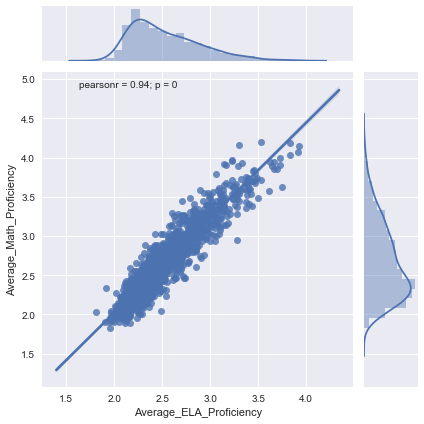

In [4]:
g = sns.JointGrid(data=data,x='Average_ELA_Proficiency',y='Average_Math_Proficiency')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

In [5]:
for i in data.columns[:50]:
    print(i)

Adjusted_Grade
New?
Other_Location_Code_in_LCGMS
School_Name
SED_Code
Location_Code
District
Latitude
Longitude
Address_(Full)
City
Zip
Grades
Grade_Low
Grade_High
Community_School?
Economic_Need_Index
School_Income_Estimate
Percent_ELL
Percent_Asian
Percent_Black
Percent_Hispanic
Percent_Black_/_Hispanic
Percent_White
Student_Attendance_Rate
Percent_of_Students_Chronically_Absent
Rigorous_Instruction_%
Rigorous_Instruction_Rating
Collaborative_Teachers_%
Collaborative_Teachers_Rating
Supportive_Environment_%
Supportive_Environment_Rating
Effective_School_Leadership_%
Effective_School_Leadership_Rating
Strong_FamilyCommunity_Ties_%
Strong_FamilyCommunity_Ties_Rating
Trust_%
Trust_Rating
Student_Achievement_Rating
Average_ELA_Proficiency
Average_Math_Proficiency
Grade_3_ELAAll_Students_Tested
Grade_3_ELA_4sAll_Students
Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native
Grade_3_ELA_4sBlack_or_African_American
Grade_3_ELA_4sHispanic_or_Latino
Grade_3_ELA_4sAsian_or_Pacific_Islander
Grade_3_EL

In [6]:
data['Average_Proficiency'] = data['Average_ELA_Proficiency'] + data['Average_Math_Proficiency']

In [7]:
working_data = data.loc[:, ['Average_Proficiency', 'Rigorous_Instruction_%',
                           'Collaborative_Teachers_%', 'Supportive_Environment_%', 'Effective_School_Leadership_%', 
                           'Strong_FamilyCommunity_Ties_%', 'Trust_%', 'Economic_Need_Index',
                           'Percent_of_Students_Chronically_Absent']]
working_data.head()

,Average_Proficiency,Rigorous_Instruction_%,Collaborative_Teachers_%,Supportive_Environment_%,Effective_School_Leadership_%,Strong_FamilyCommunity_Ties_%,Trust_%,Economic_Need_Index,Percent_of_Students_Chronically_Absent
0,4.31,0.89,0.94,0.86,0.91,0.85,0.94,0.919,0.18
1,5.61,0.96,0.96,0.97,0.90,0.86,0.94,0.641,0.30
2,4.93,0.87,0.77,0.82,0.61,0.80,0.79,0.744,0.20
3,4.95,0.85,0.78,0.82,0.73,0.89,0.88,0.860,0.28
4,4.92,0.90,0.88,0.87,0.81,0.89,0.93,0.730,0.23


In [8]:
working_data.isna().apply(np.sum, axis=0)

Average_Proficiency                       55
Rigorous_Instruction_%                    25
Collaborative_Teachers_%                  25
Supportive_Environment_%                  25
Effective_School_Leadership_%             25
Strong_FamilyCommunity_Ties_%             25
Trust_%                                   25
Economic_Need_Index                       25
Percent_of_Students_Chronically_Absent    25
dtype: int64

### Note the missing values 

In [9]:
working_data = working_data.dropna()

In [10]:
working_data.isna().apply(np.sum, axis=0)

Average_Proficiency                       0
Rigorous_Instruction_%                    0
Collaborative_Teachers_%                  0
Supportive_Environment_%                  0
Effective_School_Leadership_%             0
Strong_FamilyCommunity_Ties_%             0
Trust_%                                   0
Economic_Need_Index                       0
Percent_of_Students_Chronically_Absent    0
dtype: int64

In [11]:
working_data.dtypes

Average_Proficiency                       float64
Rigorous_Instruction_%                    float64
Collaborative_Teachers_%                  float64
Supportive_Environment_%                  float64
Effective_School_Leadership_%             float64
Strong_FamilyCommunity_Ties_%             float64
Trust_%                                   float64
Economic_Need_Index                       float64
Percent_of_Students_Chronically_Absent    float64
dtype: object

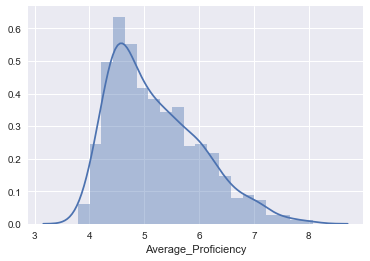

In [12]:
sns.distplot(working_data.Average_Proficiency)

### Linear regression of proficieny and quality indicator 

In [13]:
### Model 1 only with school quality indicators
X = working_data.iloc[:, [1,2,3,4,5,6]]
y = working_data['Average_Proficiency']

# Create linear regression object
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average_Proficiency   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                 1.004e+04
Date:                 Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                         17:45:18   Log-Likelihood:                -1359.3
No. Observations:                 1217   AIC:                             2731.
Df Residuals:                     1211   BIC:                             2761.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Rigorous_Instruction_%            1.6016      0.412      3.890      0.000       0.794       2.409
Collaborative_Teachers_%         -0.1552      0.833     -0.186      0.852      -1.790       1.479
Supportive_Environment_%          5.3803      0.507     10.613      0.000       4.386       6.375
Effective_School_Leadership_%     2.0439      0.525      3.890      0.000       1.013       3.075
Strong_FamilyCommunity_Ties_%     0.0038      0.414      0.009      0.993      -0.809       0.816
Trust_%                          -2.7992      0.753     -3.718      0.000      -4.276      -1.322
==============================================================================
Omnibus:                      192.518   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.688
Skew:                           0.910   Prob(JB):                     1.09e-89
Kurtosis:                       5.183   Cond. No.                         97.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
### Model 2 school quality indicators, control for economics index 
X = working_data.iloc[:, [1,2,3,4,5,6, 7]]
y = working_data['Average_Proficiency']

# Create linear regression object
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average_Proficiency   R-squared:                       0.989
Model:                             OLS   Adj. R-squared:                  0.989
Method:                  Least Squares   F-statistic:                 1.559e+04
Date:                 Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                         17:45:18   Log-Likelihood:                -1002.8
No. Observations:                 1217   AIC:                             2020.
Df Residuals:                     1210   BIC:                             2055.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Rigorous_Instruction_%            1.9471      0.308      6.332      0.000       1.344       2.550
Collaborative_Teachers_%         -0.0181      0.622     -0.029      0.977      -1.238       1.202
Supportive_Environment_%          3.0088      0.386      7.795      0.000       2.252       3.766
Effective_School_Leadership_%    -1.1570      0.405     -2.854      0.004      -1.952      -0.362
Strong_FamilyCommunity_Ties_%     0.3779      0.309      1.222      0.222      -0.229       0.985
Trust_%                           3.3360      0.596      5.600      0.000       2.167       4.505
Economic_Need_Index              -2.3565      0.076    -31.049      0.000      -2.505      -2.208
==============================================================================
Omnibus:                      737.677   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22144.620
Skew:                           2.273   Prob(JB):                         0.00
Kurtosis:                      23.397   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
### Model 3 school quality indicators, control for economics index 
X = working_data.iloc[:, [1,2,3,4,5,6,8]]
y = working_data['Average_Proficiency']

# Create linear regression object
model3 = sm.OLS(y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average_Proficiency   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                 1.096e+04
Date:                 Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                         17:45:19   Log-Likelihood:                -1214.6
No. Observations:                 1217   AIC:                             2443.
Df Residuals:                     1210   BIC:                             2479.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Rigorous_Instruction_%                     1.9262      0.366      5.260      0.000       1.208       2.645
Collaborative_Teachers_%                   0.5588      0.741      0.754      0.451      -0.895       2.013
Supportive_Environment_%                   3.8468      0.458      8.395      0.000       2.948       4.746
Effective_School_Leadership_%              0.3141      0.476      0.659      0.510      -0.621       1.249
Strong_FamilyCommunity_Ties_%              1.0027      0.372      2.695      0.007       0.273       1.733
Trust_%                                   -1.0789      0.676     -1.597      0.111      -2.404       0.247
Percent_of_Students_Chronically_Absent    -2.4939      0.138    -18.026      0.000      -2.765      -2.222
==============================================================================
Omnibus:                      585.704   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5574.511
Skew:                           2.000   Prob(JB):                         0.00
Kurtosis:                      12.692   Cond. No.                         98.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
### Model 3 school quality indicators, control for economics index 
X = working_data.iloc[:, [1,2,3,4,5,6,7,8]]
y = working_data['Average_Proficiency']

# Create linear regression object
model4 = sm.OLS(y, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average_Proficiency   R-squared:                       0.989
Model:                             OLS   Adj. R-squared:                  0.989
Method:                  Least Squares   F-statistic:                 1.391e+04
Date:                 Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                         17:45:19   Log-Likelihood:                -990.54
No. Observations:                 1217   AIC:                             1997.
Df Residuals:                     1209   BIC:                             2038.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Rigorous_Instruction_%                     1.9998      0.305      6.562      0.000       1.402       2.598
Collaborative_Teachers_%                   0.1643      0.617      0.266      0.790      -1.046       1.375
Supportive_Environment_%                   2.8388      0.384      7.396      0.000       2.086       3.592
Effective_School_Leadership_%             -1.2926      0.402     -3.211      0.001      -2.082      -0.503
Strong_FamilyCommunity_Ties_%              0.6136      0.310      1.979      0.048       0.005       1.222
Trust_%                                    3.1556      0.591      5.338      0.000       1.996       4.315
Economic_Need_Index                       -2.1049      0.091    -23.198      0.000      -2.283      -1.927
Percent_of_Students_Chronically_Absent    -0.6883      0.139     -4.953      0.000      -0.961      -0.416
==============================================================================
Omnibus:                      783.021   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24409.991
Skew:                           2.472   Prob(JB):                         0.00
Kurtosis:                      24.376   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
working_data.corr()

,Average_Proficiency,Rigorous_Instruction_%,Collaborative_Teachers_%,Supportive_Environment_%,Effective_School_Leadership_%,Strong_FamilyCommunity_Ties_%,Trust_%,Economic_Need_Index,Percent_of_Students_Chronically_Absent
Average_Proficiency,1.000000,0.318388,0.294527,0.402654,0.265703,0.205771,0.248196,-0.767468,-0.520191
Rigorous_Instruction_%,0.318388,1.000000,0.613020,0.604882,0.472646,0.425246,0.526913,-0.207639,-0.108067
Collaborative_Teachers_%,0.294527,0.613020,1.000000,0.601996,0.899248,0.470795,0.882469,-0.202364,-0.158525
Supportive_Environment_%,0.402654,0.604882,0.601996,1.000000,0.459799,0.560520,0.636291,-0.265554,-0.191384
Effective_School_Leadership_%,0.265703,0.472646,0.899248,0.459799,1.000000,0.407389,0.860575,-0.194915,-0.182050
Strong_FamilyCommunity_Ties_%,0.205771,0.425246,0.470795,0.560520,0.407389,1.000000,0.519931,-0.169495,-0.025848
Trust_%,0.248196,0.526913,0.882469,0.636291,0.860575,0.519931,1.000000,-0.150114,-0.151447
Economic_Need_Index,-0.767468,-0.207639,-0.202364,-0.265554,-0.194915,-0.169495,-0.150114,1.000000,0.566675
Percent_of_Students_Chronically_Absent,-0.520191,-0.108067,-0.158525,-0.191384,-0.182050,-0.025848,-0.151447,0.566675,1.000000


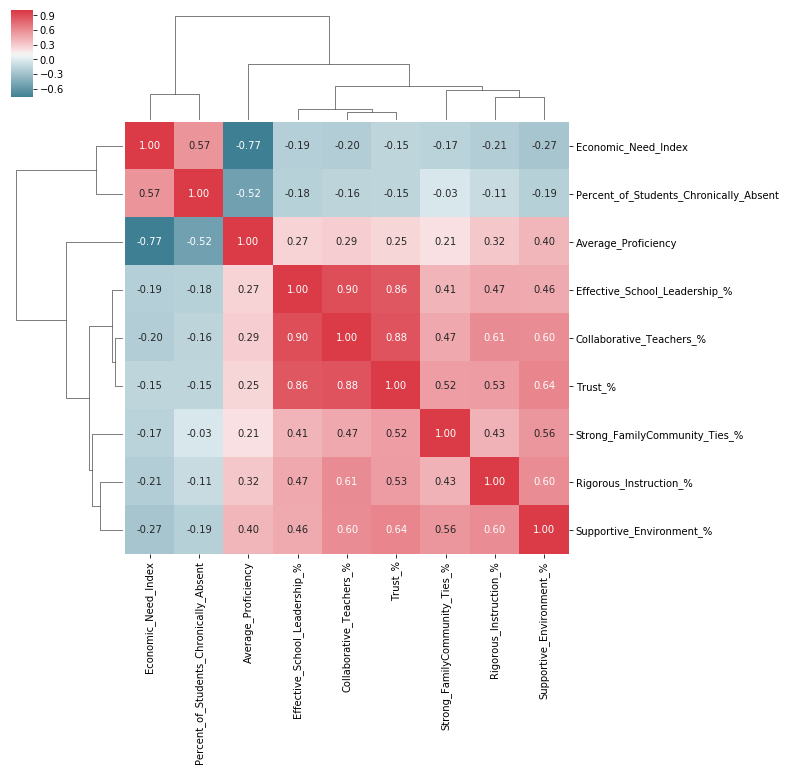

In [151]:
sns.clustermap(working_data.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")

<Figure size 1440x1440 with 0 Axes>

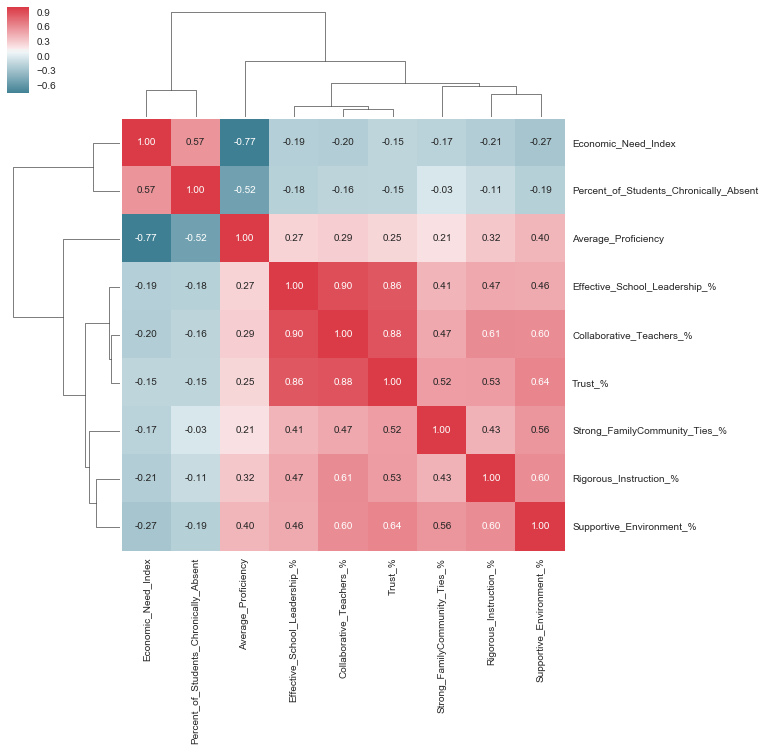

In [23]:
plt.figure(figsize=(20,20))
fig1 = sns.clustermap(working_data.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
fig1.savefig("heatmap.png")